#**Data Integration**

So far, we've made sure to remove the impurities in data and make it clean. Now, the next step is to combine data from different sources to get a unified structure with more meaningful and valuable information. This is mostly used if the data is segregated into different sources.

In [5]:
import pandas as pd

dataset1 = "student_final.txt"
dataset2 = "mark.txt"

df1 = pd.read_csv(dataset1, header = 0)
df2 = pd.read_csv(dataset2, header = 0)

In [6]:
df1

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no
...,...,...,...,...,...
227,228,21,Female,1st Class,no
228,229,20,Male,2nd Class,no
229,230,20,Male,3rd Class,yes
230,231,19,Female,1st Class,yes


In [7]:
df2

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi
...,...,...,...
227,228,99,Pune
228,229,70,Chennai
229,230,55,Delhi
230,231,97,Mumbai


In [8]:
# Student_id is common to both datasets. Perform data integration on both the DataFrames with respect to the Student_id column using the pd.merge() 

df = pd.merge(df1, df2, on = 'Student_id')
df

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
...,...,...,...,...,...,...,...
227,228,21,Female,1st Class,no,99,Pune
228,229,20,Male,2nd Class,no,70,Chennai
229,230,20,Male,3rd Class,yes,55,Delhi
230,231,19,Female,1st Class,yes,97,Mumbai


#**Data Transformation**

##**A. Encoding Categorical Features**

###**1- Replacing/ Encoding**

To address the problems associated with categorical data, we can use encoding. This is the process by which we convert a categorical variable into a numerical form. Here, we will look at three simple methods of encoding categorical data.



In [ ]:
import pandas as pd
import numpy as np

dataset1 = "student_final.txt"


df = pd.read_csv(dataset1, header = 0)

# convert into Dataframe
df = pd.DataFrame(df)
df

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no
...,...,...,...,...,...
227,228,21,Female,1st Class,no
228,229,20,Male,2nd Class,no
229,230,20,Male,3rd Class,yes
230,231,19,Female,1st Class,yes


In [ ]:
#Find the categorical column and separate it out with a different dataframe

df_categorical = df.select_dtypes(exclude=[np.number])
df_categorical

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no
...,...,...,...
227,Female,1st Class,no
228,Male,2nd Class,no
229,Male,3rd Class,yes
230,Female,1st Class,yes


In [ ]:
#Find the distinct unique values in the Grade column.
df_categorical['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

In [ ]:
#Find the frequency distribution of each categorical column.
df_categorical.Grade.value_counts()


2nd Class    80
3rd Class    80
1st Class    72
Name: Grade, dtype: int64

In [ ]:
df_categorical.Gender.value_counts()

Male      136
Female     96
Name: Gender, dtype: int64

In [ ]:
df_categorical.Employed.value_counts()

no     133
yes     99
Name: Employed, dtype: int64

In [ ]:
#Replace the entries in the Grade column. Replace 1st class with 1, 2nd class with 2, and 3rd class with 3. To do so, use the replace() function
df_categorical.Grade.replace({"1st Class":1, "2nd Class":2, "3rd Class":3}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_categorical.Gender.replace({"Male":0,"Female":1}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_categorical.Employed.replace({"yes":1,"no":0}, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_categorical

,Gender,Grade,Employed
0,0,1,1
1,1,2,0
2,0,1,0
3,1,2,0
4,0,1,0
...,...,...,...
227,1,1,0
228,0,2,0
229,0,3,1
230,1,1,1


##**2- Label Encoding**

This is a technique in which we replace each value in a categorical column with numbers from 0 to N-1. For example, say we've got a list of employee names in a column. After performing label encoding, each employee name will be assigned a numeric label. But this might not be suitable for all cases because the model might consider numeric values to be weights assigned to the data. Label encoding is the best method to use for ordinal data. The scikit-learn library provides LabelEncoder(), which helps with label encoding. 

In [ ]:
import pandas as pd
import numpy as np
#https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Banking_Marketing.csv

dataset = 'banking.txt'

df = pd.read_csv(dataset, header=0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
#Before doing the encoding, remove all the missing data.
df = df.dropna()

In [ ]:
#Select all the columns that are not numeric 
data_column_category = df.select_dtypes(exclude=[np.number]).columns
# data_column_category
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


Iterate through this category column and convert it to numeric data using LabelEncoder(). To do so, import the sklearn.preprocessing package and use the LabelEncoder() class to transform the data:

In [ ]:
#import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

#Creating the object instance
label_encoder = LabelEncoder()
for i in data_column_category:
    df[i] = label_encoder.fit_transform(df[i])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,1,0,0,1,2,210,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,7,1,6,0,0,0,0,5,0,138,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,5,0,1,0,0,3,2,339,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,6,1,3,0,0,0,0,0,0,185,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,1,0,0,1,0,137,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


##**3- One-Hot Encoding**

In label encoding, categorical data is converted to numerical data, and the values are assigned labels (such as 1, 2, and 3). Predictive models that use this numerical data for analysis might sometimes mistake these labels for some kind of order (for example, a model might think that a label of 3 is "better" than a label of 1, which is incorrect). In order to avoid this confusion, we can use one-hot encoding. Here, the label-encoded data is further divided into n number of columns. Here, n denotes the total number of unique labels generated while performing label encoding. For example, say that three new labels are generated through label encoding. Then, while performing one-hot encoding, the columns will be divided into three parts. So, the value of n is 3. Let's look at an exercise to get further clarification.

In [ ]:
import pandas as pd
import numpy as np
#https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Banking_Marketing.csv

dataset = 'banking.txt'

df = pd.read_csv(dataset, header=0)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
#Before doing the encoding, remove all the missing data.
df = df.dropna()

#Select all the columns that are not numeric 
data_column_category = df.select_dtypes(exclude=[np.number]).columns
# data_column_category
df[data_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


Iterate through these category columns and convert them to numeric data using OneHotEncoder. To do so, import the sklearn.preprocessing package and avail yourself of the OneHotEncoder() class do the transformation. Before performing one-hot encoding, we need to perform label encoding:

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in data_column_category:
    df[i] = label_encoder.fit_transform(df[i])


df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,1,0,0,1,2,210,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,7,1,6,0,0,0,0,5,0,138,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,5,0,1,0,0,3,2,339,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,6,1,3,0,0,0,0,0,0,185,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,1,0,0,1,0,137,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
#Performing Onehot Encoding
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[data_column_category])

In [ ]:
#Creating a dataframe with encoded data with new column name

onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(data_column_category))

onehot_encoded_frame.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,marital_0,marital_1,marital_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,default_0,default_1,housing_0,housing_1,loan_0,loan_1,contact_0,contact_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
onehot_encoded_frame.iloc[:,0]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     1.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    1.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
20    0.0
21    0.0
22    1.0
23    0.0
24    0.0
25    0.0
26    0.0
27    1.0
28    0.0
29    0.0
30    0.0
Name: job_0, dtype: float64

In [ ]:
# Due to one-hot encoding, the number of columns in the new dataframe has increased. In order to view and print all the columns created, use the columns attribute:
onehot_encoded_frame.columns

Index(['job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'marital_0', 'marital_1', 'marital_2', 'education_0',
       'education_1', 'education_2', 'education_3', 'education_4',
       'education_5', 'education_6', 'default_0', 'default_1', 'housing_0',
       'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'month_0',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')

In [ ]:
# # For every level or category, a new column is created. In order to prefix the category name with the column name you can use this alternate way to create one-hot encoding. 
# df_onehot_getdummies = pd.get_dummies(df[data_column_category], prefix=data_column_category)

# data_onehot_encoded_data = pd.concat([df_onehot_getdummies,df[data_column_number]],axis = 1)

# data_onehot_encoded_data.columns

##**Normalization**

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1



Python provides the preprocessing library, which contains the normalize function to normalize the data. It takes an array in as an input and normalizes its values between 00 and 11. It then returns an output array with the same dimensions as the input

In [ ]:
from sklearn import preprocessing
import numpy as np

a = np.random.random((1, 6))
data = a*20
print("Data = ", data)

# normalize the data attributes
normalized = preprocessing.normalize(data, "l1")
print("Normalized Data = ", normalized)

Data =  [[13.69036784 14.83591464  6.00924742  4.7313553   8.62141035  8.45364552]]
Normalized Data =  [[0.24298715 0.2633192  0.10665673 0.08397572 0.15301941 0.15004179]]


**Using MinMaxScaler() to Normalize Data in Python**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

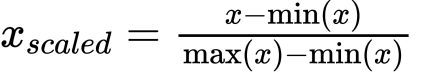

In [ ]:
min_a = np.min(data)
max_a = np.max(data) 
print(min_a)
print(max_a)

4.844108102521147
10.796434685102497


In [ ]:
data_a = (data - min_a) / ( max_a - min_a)
print(data_a)

[[0.57358409 0.67937222 0.25386879 0.77932439 0.         1.        ]]


**Another Example:**

In [ ]:
housing = pd.read_csv("/content/sample_data/california_housing_train.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = housing.columns
d = scaler.fit_transform(housing)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


**Z-Score Normalization**

https://datagy.io/python-z-score/

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict({
    'Name': ['Nik', 'Kate', 'Joe', 'Mitch', 'Alana'],
    'Age': [32, 30, 67, 34, 20],
    'Income': [80000, 90000, 45000, 23000, 12000],
    'Education' : [5, 7, 3, 4, 4]
})

print(df.head())

    Name  Age  Income  Education
0    Nik   32   80000          5
1   Kate   30   90000          7
2    Joe   67   45000          3
3  Mitch   34   23000          4
4  Alana   20   12000          4


In [ ]:
import scipy.stats as stats

df['Income zscore'] = stats.zscore(df['Income'])
print(df.head())

    Name  Age  Income  Education  Income zscore
0    Nik   32   80000          5       0.978700
1   Kate   30   90000          7       1.304934
2    Joe   67   45000          3      -0.163117
3  Mitch   34   23000          4      -0.880830
4  Alana   20   12000          4      -1.239687


In [ ]:
df = df.select_dtypes(include='number').apply(stats.zscore)
print(df.head())

        Age    Income  Education  Income zscore
0 -0.288493  0.978700   0.294884       0.978700
1 -0.413925  1.304934   1.769303       1.304934
2  1.906565 -0.163117  -1.179536      -0.163117
3 -0.163061 -0.880830  -0.442326      -0.880830
4 -1.041085 -1.239687  -0.442326      -1.239687


##**Data Standardization or mean removal and variance scaling** 

In [ ]:
import pandas as pd
import numpy as np

dataset = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Wholesale%20customers%20data.csv'

df = pd.read_csv(dataset, header=0)
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Check whether there is any missing data. If there is, drop the missing data:
null_ = df.isna().any()
dtypes = df.dtypes

info = pd.concat([null_,dtypes],axis = 1,keys = ['Null','type'])

print(info)

                   Null   type
Channel           False  int64
Region            False  int64
Fresh             False  int64
Milk              False  int64
Grocery           False  int64
Frozen            False  int64
Detergents_Paper  False  int64
Delicassen        False  int64


Now perform standard scaling and print the first five rows of the new dataset. To do so, use the StandardScaler() class from sklearn.preprocessing and implement the fit_transorm() method:
from sklearn import preprocessing

In [ ]:
# from sklearn.preprocessing and implement the fit_transorm() method

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit_transform(df)

scaled_frame = pd.DataFrame(std_scale, columns=df.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
np.mean(scaled_frame.iloc[:,2])

-2.4223047810003414e-17

Using the `StandardScaler` method, we have scaled the data into a uniform unit over all the columns. As you can see in the preceding table, the values of all the features have been converted into a uniform range of the same scale. Because of this, it becomes easier for the model to make predictions.

You have successfully scaled the data using the `StandardScaler` method. In the next section, we'll implement scaling using the `MinMax scaler` method.

In [ ]:
import pandas as pd
import numpy as np

dataset = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Wholesale%20customers%20data.csv'

df = pd.read_csv(dataset, header=0)
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Check whether there is any missing data. If there is, drop the missing data:
null_ = df.isna().any()
dtypes = df.dtypes

info = pd.concat([null_,dtypes],axis = 1,keys = ['Null','type'])

print(info)

                   Null   type
Channel           False  int64
Region            False  int64
Fresh             False  int64
Milk              False  int64
Grocery           False  int64
Frozen            False  int64
Detergents_Paper  False  int64
Delicassen        False  int64


Perform `MinMax` scaling and print the initial five values of the new dataset. To do so, use the `MinMaxScaler()` class from sklearn.preprocessing and implement the `fit_transorm()` method. 

In [ ]:
# from sklearn import preprocessing

# minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)

# scaled_frame = pd.DataFrame(minmax_scale,columns=df.columns)

# scaled_frame.head()

##**Data Generalization**

In [ ]:
import pandas as pd

dataset1 = "student.txt"
dataset2 = "mark.txt"

df1 = pd.read_csv(dataset1, header = 0)
df2 = pd.read_csv(dataset2, header = 0)

In [ ]:
#Perform bucketing using the pd.cut() function on the marks column and display the top 10 columns.
df1['Bucket']=pd.cut(df2['Mark'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])

df1.head()

,Student_id,Age,Grade,Employed,marks,Bucket
0,1,19,1st Class,yes,29,Excellent
1,2,20,2nd Class,no,41,Average
2,3,18,1st Class,no,57,Excellent
3,4,21,2nd Class,no,29,Average
4,5,19,1st Class,no,57,Excellent


##**Data Cube Aggregation**

Aggregate using one or more operations over the specified axis.

`agg` Function to use for aggregating the data.

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A': [1, 1, 2, 2], 'B': [1, 2, 3, 4], 'C': np.random.randn(4)})

In [11]:
df

,A,B,C
0,1,1,0.447870
1,1,2,-0.844566
2,2,3,-0.068087
3,2,4,-0.763725


In [ ]:
df.groupby('A').agg('min')


,B,C
A,,
1,1,-0.313581
2,3,-0.263034
3,4,-1.894975


In [ ]:
df.groupby('A').agg(['min', 'max'])

B             C          
  min max       min       max
A                            
1   1   2 -0.903910  1.368001
2   3   4  1.290793  1.547282

In [ ]:
df.groupby('A').B.agg(['min', 'max'])

,min,max
A,,
1,1,2
2,3,4


In [ ]:
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

B             C
  min max       sum
A                  
1   1   2  0.464091
2   3   4  2.838075